In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('10.xlsx')
df1 = pd.read_excel('10.xlsx',sheet_name='Sheet2')
# df.drop(columns=df['Unnamed: 0'],inplace=True)
print(df1.sample(10))
df.head(5)

           PRN  No of Offers                 Company 1   Salary
82  UCS19F1074             1             Cyber Success      NaN
80  UCS19F1127             1             Cyber Success      NaN
63  UCS19M1027             1  iBrain Decision Software  2.4 LPA
13  UCS19M1066             1      Celebal Technologies  5.5 LPA
44  UCS19M1125             1                      KPIT  4.5 LPA
35  UCS19F1120             1         Colgate Palmolive  8.2 LPA
2   UCS19M1015             1      Celebal Technologies  5.5 LPA
76  UCS19M1118             1                   QSpyder      NaN
95  UCS19M1086             1   Ergobite Tech Solutions  4.5 LPA
19  UCS19M1012             1      Celebal Technologies  5.5 LPA


,PRN,Gender,10th Percentage,Medium of School Education,HSC / Diploma,Name of Board for 12th Exam,12th Percentage,Semester 1 CGPA,Semester 2 CGPA,Semester 3 SGPA,Semester 4 CGPA,Semester 5 CGPA
0,UCS19M1093,Male,84.6,Semi English,HSC,Maharashtra state secondary and higher seconda...,77.69,7.7,8.6,8.10,8.80,8.50
1,UCS19M1128,Male,82.2,English,HSC,Maharashtra state secondary and higher seconda...,72.00,8.55,8.86,8.14,8.66,0.00
2,UCS19M1102,Male,80.4,Semi English,HSC,Maharashtra state secondary and higher seconda...,62.62,7.73,7.95,7.73,8.50,8.10
3,UCS19M1108,Male,88.0,Marathi,HSC,Maharashtra state secondary and higher seconda...,69.85,7.68,8.09,7.68,7.88,8.08
4,UCS19M1122,Male,94.2,English,HSC,Maharashtra state secondary and higher seconda...,80.77,8.86,9.82,8.64,9.27,9.55


In [3]:
main_df = pd.merge(df, df1, on='PRN', how='outer')
main_df.tail(10)

,PRN,Gender,10th Percentage,Medium of School Education,HSC / Diploma,Name of Board for 12th Exam,12th Percentage,Semester 1 CGPA,Semester 2 CGPA,Semester 3 SGPA,Semester 4 CGPA,Semester 5 CGPA,No of Offers,Company 1,Salary
153,UCS19M1130,Male,79.800,Semi English,HSC,Maharashtra state secondary and higher seconda...,61.38,7.06,7.09,7.05,7.04,7.05,NaN,NaN,NaN
154,UCS18M2007,Male,0.742,Semi English,HSC,Maharashtra state secondary and higher seconda...,54.15,6.44,6.44,5.89,6.98,6.44,NaN,NaN,NaN
155,UCS19F1067,Female,79.800,Semi English,HSC,Maharashtra state secondary and higher seconda...,60.92,6.7,7,6.07,7.00,6.70,1.0,QSpyder,NaN
156,UCS19F1112,Female,0.686,Marathi,HSC,Maharashtra state secondary and higher seconda...,49.85,6.02,6.08,6.05,6.05,6.08,NaN,NaN,NaN
157,UCS19F1033,Female,84.600,English,HSC,Maharashtra state secondary and higher seconda...,74.15,7.04,7.09,7.06,7.07,7.08,1.0,Deloitte Super 100,NaN
158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,UCS19F1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Colgate Palmolive,8.2 LPA
161,UCS18F2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,QSpyder,NaN
162,UCS19F1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Cyber Success,3.6 LPA


In [4]:
prns_to_drop = ['UCS19F1032', 'UCS18F2016', 'UCS19F1069']

# Drop rows where 'PRN' is in the list
df_filtered = main_df[~main_df['PRN'].isin(prns_to_drop)]
df_filtered['Name of Board for 12th Exam'].fillna('Maharashtra state secondary and higher secondary board',inplace=True)
mean_12th_percentage = df_filtered['12th Percentage'].mean()
# Fill null values in '12th Percentage' with the mean value
df_filtered.loc[:, '12th Percentage'] = df_filtered['12th Percentage'].fillna(mean_12th_percentage)

# df_filtered.isnull().sum()
# Create 'Placed' column
df_filtered['Placed'] = df_filtered['Company 1'].notnull()

# Apply nominal encoding to 'Gender'
gender_mapping = {'Male': 0, 'Female': 1}  # You may adjust the mapping based on your actual data
df_filtered['Gender'] = df_filtered['Gender'].map(gender_mapping)

# Display the resulting DataFrame
print(df_filtered)

df_filtered.isnull().sum()
print(df_filtered.columns)

            PRN  Gender  10th Percentage  Medium of School Education  \
0    UCS19M1093     0.0            84.600               Semi English   
1    UCS19M1128     0.0            82.200                    English   
2    UCS19M1102     0.0            80.400               Semi English   
3    UCS19M1108     0.0            88.000                    Marathi   
4    UCS19M1122     0.0            94.200                    English   
..          ...     ...               ...                        ...   
155  UCS19F1067     1.0            79.800               Semi English   
156  UCS19F1112     1.0             0.686                    Marathi   
157  UCS19F1033     1.0            84.600                    English   
158         NaN     NaN               NaN                        NaN   
159         NaN     NaN               NaN                        NaN   

    HSC / Diploma                        Name of Board for 12th Exam  \
0             HSC  Maharashtra state secondary and higher secon

c:\Users\Om Bade\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\Users\Om Bade\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Om Bade\AppData\Local\Temp\ipykernel_16452\566805761.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [5]:
# Assuming your DataFrame is named df_filtered
columns_list = df_filtered.columns.tolist()

# Print the list of columns
print(columns_list)


['PRN', 'Gender', '10th Percentage ', 'Medium of School Education', 'HSC / Diploma', 'Name of Board for 12th Exam', '12th Percentage', 'Semester 1 CGPA', 'Semester 2 CGPA', 'Semester 3 SGPA', 'Semester 4 CGPA', 'Semester 5 CGPA', 'No of Offers', 'Company 1', 'Salary', 'Placed']


In [6]:
# Create a new DataFrame with selected columns
new_df = df_filtered[['Gender', '10th Percentage ', '12th Percentage', 'Semester 1 CGPA', 'Semester 2 CGPA', 'Semester 3 SGPA', 'Semester 4 CGPA', 'Semester 5 CGPA', 'Placed']].copy()

# Convert selected columns to numeric, replacing errors with NaN
numeric_columns = ['10th Percentage ', '12th Percentage', 'Semester 1 CGPA', 'Semester 2 CGPA', 'Semester 3 SGPA', 'Semester 4 CGPA', 'Semester 5 CGPA']
new_df[numeric_columns] = new_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Replace 0 values with the mean of each respective column
for col in numeric_columns:
    new_df[col] = new_df[col].replace(0, new_df[col].mean())

new_df.head(34)


,Gender,10th Percentage,12th Percentage,Semester 1 CGPA,Semester 2 CGPA,Semester 3 SGPA,Semester 4 CGPA,Semester 5 CGPA,Placed
0,0.0,84.60,77.690000,7.70,8.60,8.10,8.80,8.500000,True
1,0.0,82.20,72.000000,8.55,8.86,8.14,8.66,4.461772,True
2,0.0,80.40,62.620000,7.73,7.95,7.73,8.50,8.100000,False
3,0.0,88.00,69.850000,7.68,8.09,7.68,7.88,8.080000,True
4,0.0,94.20,80.770000,8.86,9.82,8.64,9.27,9.550000,False
5,0.0,80.00,60.460000,6.80,7.10,7.10,7.40,7.700000,False
6,0.0,90.40,67.230000,7.91,8.82,7.36,8.45,8.860000,True
7,0.0,93.60,78.310000,7.27,7.66,5.57,7.75,8.400000,True
8,0.0,0.92,75.230000,8.14,8.45,8.34,8.66,8.660000,True
9,1.0,89.20,61.080000,8.14,9.09,7.23,8.27,4.461772,True


In [7]:
new_df.columns

Index(['Gender', '10th Percentage ', '12th Percentage', 'Semester 1 CGPA',
       'Semester 2 CGPA', 'Semester 3 SGPA', 'Semester 4 CGPA',
       'Semester 5 CGPA', 'Placed'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OrdinalEncoder
import pandas as pd

# Assuming your dataframe is named df
df_ml = new_df.copy()
numeric_columns = ['10th Percentage ', '12th Percentage', 'Semester 1 CGPA', 'Semester 2 CGPA', 'Semester 3 SGPA', 'Semester 4 CGPA', 'Semester 5 CGPA']
df_ml[numeric_columns] = df_ml[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with mean
df_ml[numeric_columns] = df_ml[numeric_columns].fillna(df_ml[numeric_columns].mean())
# Standardization using StandardScaler
columns_to_standardize = ['10th Percentage ', '12th Percentage', 'Semester 1 CGPA', 'Semester 2 CGPA', 'Semester 3 SGPA', 'Semester 4 CGPA', 'Semester 5 CGPA']
min =MinMaxScaler()
df_ml[columns_to_standardize] = min.fit_transform(df_ml[columns_to_standardize])

# Normalization using MinMaxScaler
# columns_to_normalize = ['Salary']  # Assuming 'Salary' is the column to normalize
# scaler = MinMaxScaler()
# df_ml[columns_to_normalize] = scaler.fit_transform(df_ml[columns_to_normalize])
ordinal = OrdinalEncoder()
df_ml['Gender'] = ordinal.fit_transform(df_ml[['Gender']])
# One-hot encoding for 'Gender' column
# df_ml = pd.get_dummies(df_ml, columns=['Gender'])
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named df_ml
le = LabelEncoder()
df_ml['Placed'] = le.fit_transform(df_ml['Placed'])
# Display the resulting DataFrame
# Convert string values to numeric (excluding 'Salary' column)


df_ml.head(34)


,Gender,10th Percentage,12th Percentage,Semester 1 CGPA,Semester 2 CGPA,Semester 3 SGPA,Semester 4 CGPA,Semester 5 CGPA,Placed
0,0.0,0.887864,0.714763,0.702087,0.745098,0.703125,0.734336,0.793641,1
1,0.0,0.862475,0.568678,0.863378,0.796078,0.712054,0.699248,0.000000,1
2,0.0,0.843433,0.327856,0.707780,0.617647,0.620536,0.659148,0.715028,0
3,0.0,0.923832,0.513479,0.698292,0.645098,0.609375,0.503759,0.711098,1
4,0.0,0.989421,0.793838,0.922201,0.984314,0.823661,0.852130,1.000000,0
5,0.0,0.839201,0.272401,0.531309,0.450980,0.479911,0.383459,0.636416,0
6,0.0,0.949221,0.446213,0.741935,0.788235,0.537946,0.646617,0.864393,1
7,0.0,0.983074,0.730680,0.620493,0.560784,0.138393,0.471178,0.773988,1
8,0.0,0.002624,0.651605,0.785579,0.715686,0.756696,0.699248,0.825086,1
9,1.0,0.936527,0.288318,0.785579,0.841176,0.508929,0.601504,0.000000,1


<AxesSubplot:xlabel='Semester 3 SGPA', ylabel='Semester 4 CGPA'>

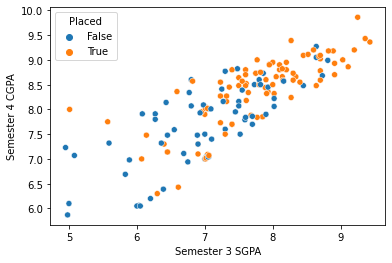

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=new_df['Semester 3 SGPA'], y=new_df['Semester 4 CGPA'],hue=new_df['Placed'])

<AxesSubplot:xlabel='Semester 2 CGPA', ylabel='Semester 3 SGPA'>

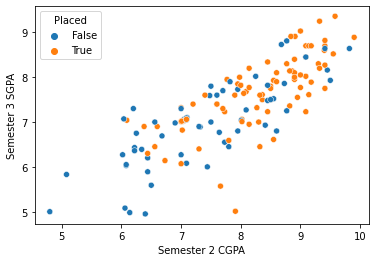

In [10]:
sns.scatterplot(x=new_df['Semester 2 CGPA'], y=new_df['Semester 3 SGPA'],hue=new_df['Placed'])

<AxesSubplot:xlabel='12th Percentage', ylabel='Semester 4 CGPA'>

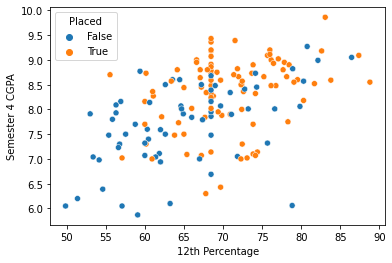

In [11]:
sns.scatterplot(x=new_df['12th Percentage'], y=new_df['Semester 4 CGPA'],hue=new_df['Placed'],markers =new_df['Gender'])

<AxesSubplot:xlabel='10th Percentage ', ylabel='12th Percentage'>

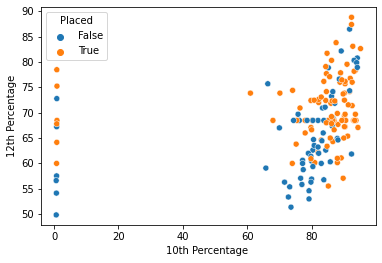

In [12]:
sns.scatterplot(x=new_df['10th Percentage '], y=new_df['12th Percentage'],hue=new_df['Placed'],markers =new_df['Gender'])

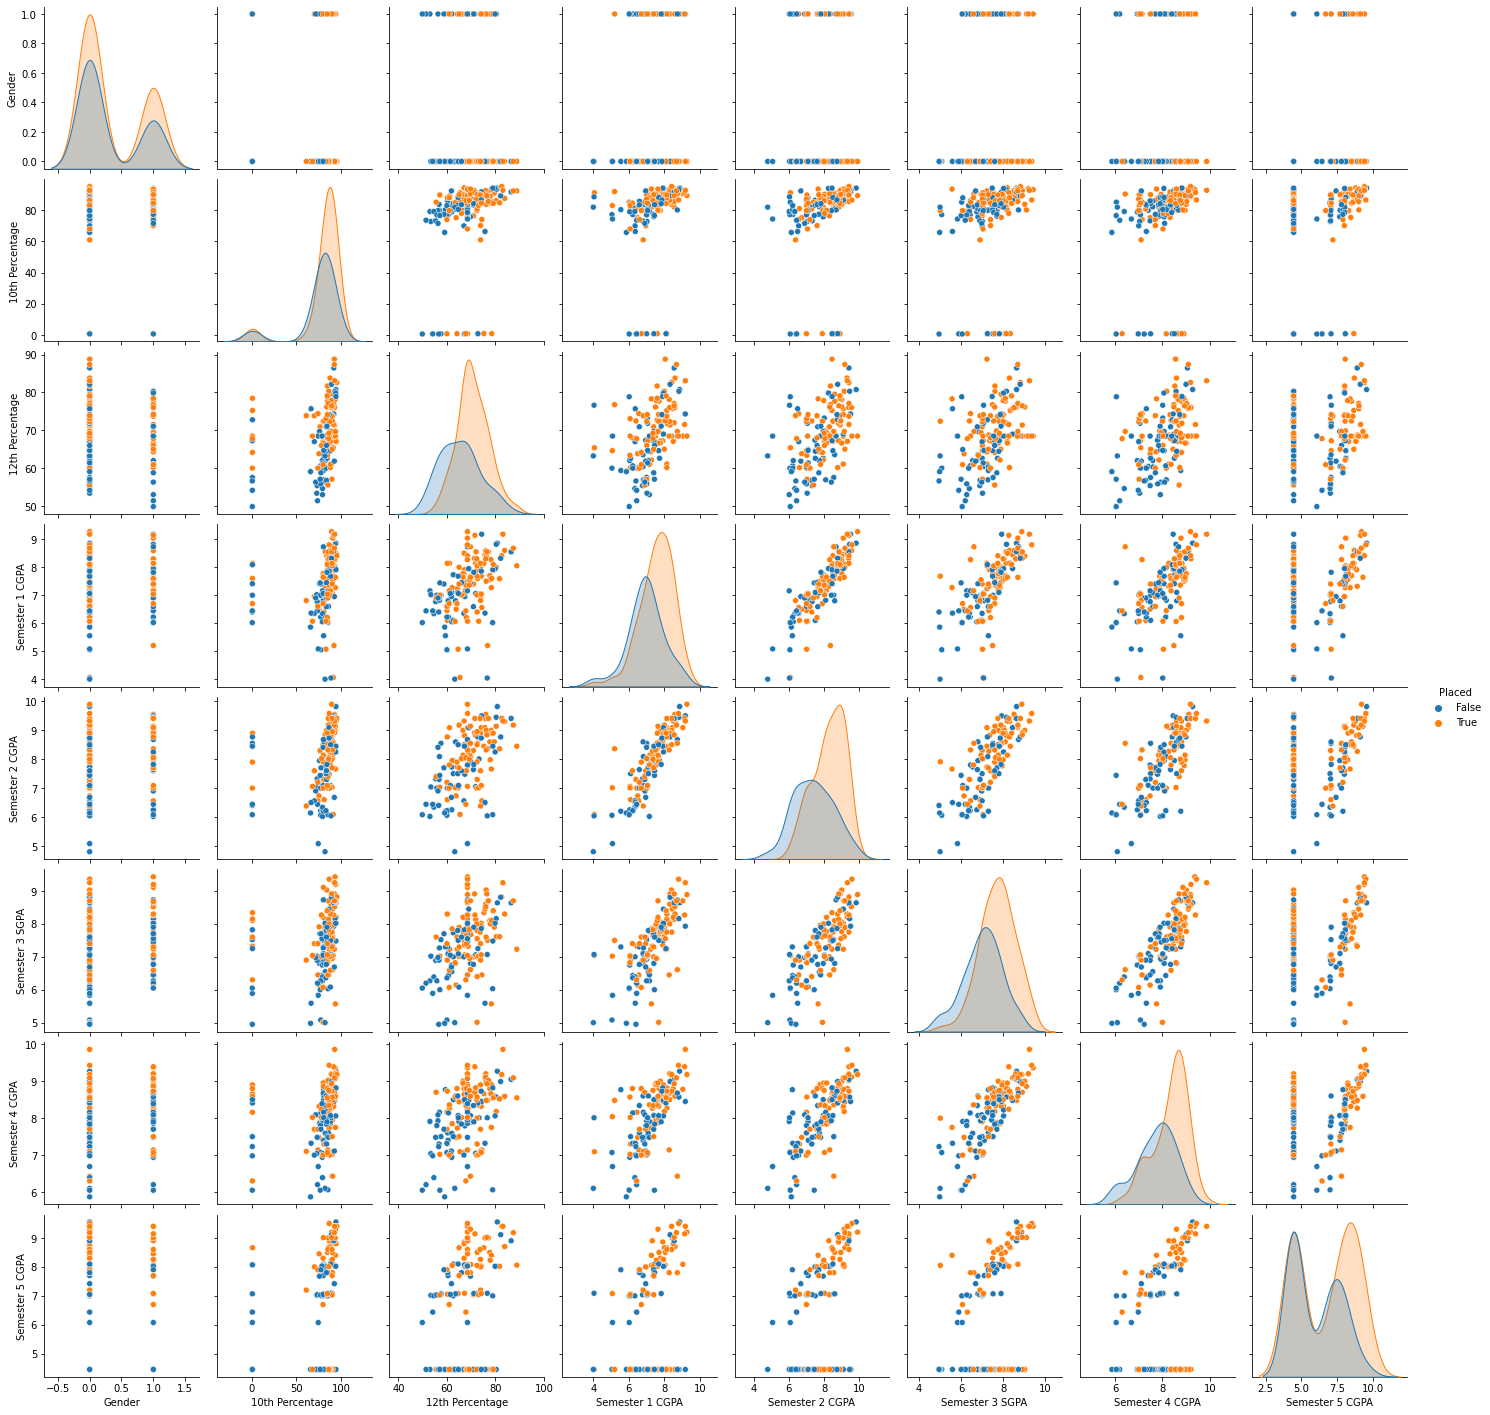

In [36]:
sns.pairplot(new_df, hue='Placed')


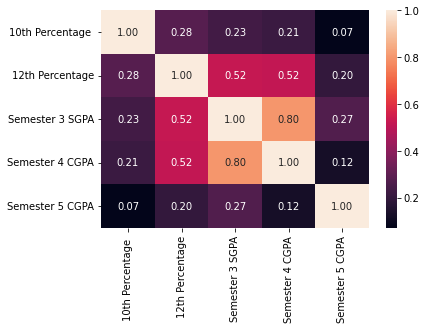

In [14]:
sns.heatmap(df.corr(),annot=True,fmt="0.02f")
plt.show()

In [42]:
from sklearn.impute import SimpleImputer
import numpy as np

# Identify columns with missing values
columns_with_missing_values = df_ml.columns[df_ml.isnull().any()]

# Check if the columns with missing values have numerical dtype
numerical_columns_with_missing_values = df_ml[columns_with_missing_values].select_dtypes(include=[np.number]).columns

# Impute missing values with mean for numerical columns
if not numerical_columns_with_missing_values.empty:
    imputer = SimpleImputer(strategy='mean')
    df_ml[numerical_columns_with_missing_values] = imputer.fit_transform(df_ml[numerical_columns_with_missing_values])

# Check for infinite values and replace them if necessary
df_ml.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ml.dropna(inplace=True)  # Drop rows with infinite values, if any

# Now you can proceed with splitting the data and fitting your model


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features and target variable
X = df_ml.drop('Placed', axis=1)
y = df_ml['Placed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

# SVM
svm_model = SVC(random_state=42,kernel='poly')
svm_model.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

# Ensemble Learning - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# N-fold Cross-Validation
n_fold = 10
dt_cv_accuracy = cross_val_score(dt_model, X, y, cv=n_fold, scoring='accuracy').mean()
svm_cv_accuracy = cross_val_score(svm_model, X, y, cv=n_fold, scoring='accuracy').mean()
knn_cv_accuracy = cross_val_score(knn_model, X, y, cv=n_fold, scoring='accuracy').mean()
nb_cv_accuracy = cross_val_score(nb_model, X, y, cv=n_fold, scoring='accuracy').mean()
rf_cv_accuracy = cross_val_score(rf_model, X, y, cv=n_fold, scoring='accuracy').mean()

print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("\nN-fold Cross-Validation Accuracy:")
print("Decision Tree:", dt_cv_accuracy)
print("SVM:", svm_cv_accuracy)
print("KNN:", knn_cv_accuracy)
print("Naive Bayes:", nb_cv_accuracy)
print("Random Forest:", rf_cv_accuracy)


Decision Tree Accuracy: 0.65625
SVM Accuracy: 0.59375
KNN Accuracy: 0.46875
Naive Bayes Accuracy: 0.5
Random Forest Accuracy: 0.59375

N-fold Cross-Validation Accuracy:
Decision Tree: 0.625
SVM: 0.66875
KNN: 0.6125
Naive Bayes: 0.64375
Random Forest: 0.675


In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense

# Features and target variable
X = df_ml.drop('Placed', axis=1)
y = df_ml['Placed']

# Train-test split for non-LSTM models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Standardize the data for non-LSTM models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test_scaled))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test_scaled))

# Ensemble Learning - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# N-fold Cross-Validation for non-LSTM models
n_fold = 5
dt_cv_accuracy = cross_val_score(dt_model, X, y, cv=n_fold, scoring='accuracy').mean()
svm_cv_accuracy = cross_val_score(svm_model, X, y, cv=n_fold, scoring='accuracy').mean()
knn_cv_accuracy = cross_val_score(knn_model, X, y, cv=n_fold, scoring='accuracy').mean()
nb_cv_accuracy = cross_val_score(nb_model, X, y, cv=n_fold, scoring='accuracy').mean()
rf_cv_accuracy = cross_val_score(rf_model, X, y, cv=n_fold, scoring='accuracy').mean()

print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("\nN-fold Cross-Validation Accuracy:")
print("Decision Tree:", dt_cv_accuracy)
print("SVM:", svm_cv_accuracy)
print("KNN:", knn_cv_accuracy)
print("Naive Bayes:", nb_cv_accuracy)
print("Random Forest:", rf_cv_accuracy)

# LSTM Model
# Reshape X for LSTM (assuming it's a 2D array)
X_lstm = X.values.reshape((X.shape[0], 1, X.shape[1]))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(1, X.shape[1])))
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train-test split for LSTM model
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=35)

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)

# Evaluate the LSTM model
lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)[1]
print("\nLSTM Accuracy:", lstm_accuracy)


ImportError: cannot import name 'KerasLazyLoader' from 'tensorflow.python.util.lazy_loader' (c:\Users\Om Bade\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\lazy_loader.py)

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# Features and target variable
X = df_ml.drop('Placed', axis=1)
y = df_ml['Placed']

# Train-test split for non-LSTM models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Standardize the data for non-LSTM models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

# SVM
svm_model = SVC(random_state=42,kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test_scaled))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test_scaled))

# Ensemble Learning - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# N-fold Cross-Validation for non-LSTM models
n_fold = 5
dt_cv_accuracy = cross_val_score(dt_model, X, y, cv=n_fold, scoring='accuracy').mean()
svm_cv_accuracy = cross_val_score(svm_model, X, y, cv=n_fold, scoring='accuracy').mean()
knn_cv_accuracy = cross_val_score(knn_model, X, y, cv=n_fold, scoring='accuracy').mean()
nb_cv_accuracy = cross_val_score(nb_model, X, y, cv=n_fold, scoring='accuracy').mean()
rf_cv_accuracy = cross_val_score(rf_model, X, y, cv=n_fold, scoring='accuracy').mean()

print("Decision Tree Accuracy:", dt_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

print("\nN-fold Cross-Validation Accuracy:")
print("Decision Tree:", dt_cv_accuracy)
print("SVM:", svm_cv_accuracy)
print("KNN:", knn_cv_accuracy)
print("Naive Bayes:", nb_cv_accuracy)
print("Random Forest:", rf_cv_accuracy)

# LSTM Model
# Reshape X for LSTM (assuming it's a 2D array)
X_lstm = X.values.reshape((X.shape[0], 1, X.shape[1]))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(1, X.shape[1])))
lstm_model.add(Dense(units=1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train-test split for LSTM model
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=35)

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)

# Evaluate the LSTM model
lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)[1]
print("\nLSTM Accuracy:", lstm_accuracy)


Decision Tree Accuracy: 0.6875
SVM Accuracy: 0.53125
KNN Accuracy: 0.53125
Naive Bayes Accuracy: 0.46875
Random Forest Accuracy: 0.625

N-fold Cross-Validation Accuracy:
Decision Tree: 0.5625
SVM: 0.63125
KNN: 0.6625
Naive Bayes: 0.65
Random Forest: 0.6625


NameError: name 'Sequential' is not defined

In [16]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# N-fold Cross-Validation for XGBoost
xgb_cv_accuracy = cross_val_score(xgb_model, X, y, cv=n_fold, scoring='accuracy').mean()

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost N-fold Cross-Validation Accuracy:", xgb_cv_accuracy)


XGBoost Accuracy: 0.59375
XGBoost N-fold Cross-Validation Accuracy: 0.60625


In [17]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples containing the model name and the actual model
models = [
          ('SVM', svm_model),
          
          ('Naive Bayes', nb_model),
          ('Random Forest', rf_model),
        ]

# Create a Voting Classifier with 'hard' voting (simple majority voting)
ensemble_model = VotingClassifier(estimators=models, voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_accuracy = accuracy_score(y_test, ensemble_model.predict(X_test))

# N-fold Cross-Validation for the ensemble model
ensemble_cv_accuracy = cross_val_score(ensemble_model, X, y, cv=n_fold, scoring='accuracy').mean()

print("Ensemble Learning Accuracy:", ensemble_accuracy)
print("Ensemble Learning N-fold Cross-Validation Accuracy:", ensemble_cv_accuracy)


Ensemble Learning Accuracy: 0.59375
Ensemble Learning N-fold Cross-Validation Accuracy: 0.65625


In [18]:
co =pd.read_excel('10.xlsx',sheet_name='Sheet3')
co

,Name,"Branch, Degree",Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Written English
0,Tanuja Ramesh Gadhe,"Computer Engineering, B. Tech.",666,73,73,60,87,70,67,100,77
1,Sairaj Pradip Bhakare,"Computer Engineering, B. Tech.",656,73,87,47,87,60,67,100,62
2,Vivek Vijay Kadam,"Computer Engineering, B. Tech.",656,78,80,73,80,50,67,100,67
3,Mayur Kailas Pawar,"Computer Engineering, B. Tech.",644,73,93,53,73,0,93,96,80
4,Pandhare Harshalini Balu,"Computer Engineering, B. Tech.",634,71,73,73,67,0,67,86,91
...,...,...,...,...,...,...,...,...,...,...,...
668,Wakchaure Chandrashekhar Dilip,"Civil Engineering, B. Tech.",263,29,27,27,33,25,0,0,0
669,Tejas Dattatray Ude,"Mechanical Engineering, B. Tech.",250,2,0,0,7,65,0,0,35
670,Ashok Balasaheb Jambhale,"Mechanical Engineering, B. Tech.",249,29,33,27,27,0,0,0,0
671,Shruti Devidas Navgire,"Computer Engineering, B. Tech.",248,0,0,0,0,70,53,43,43


KeyError: 'Placed'

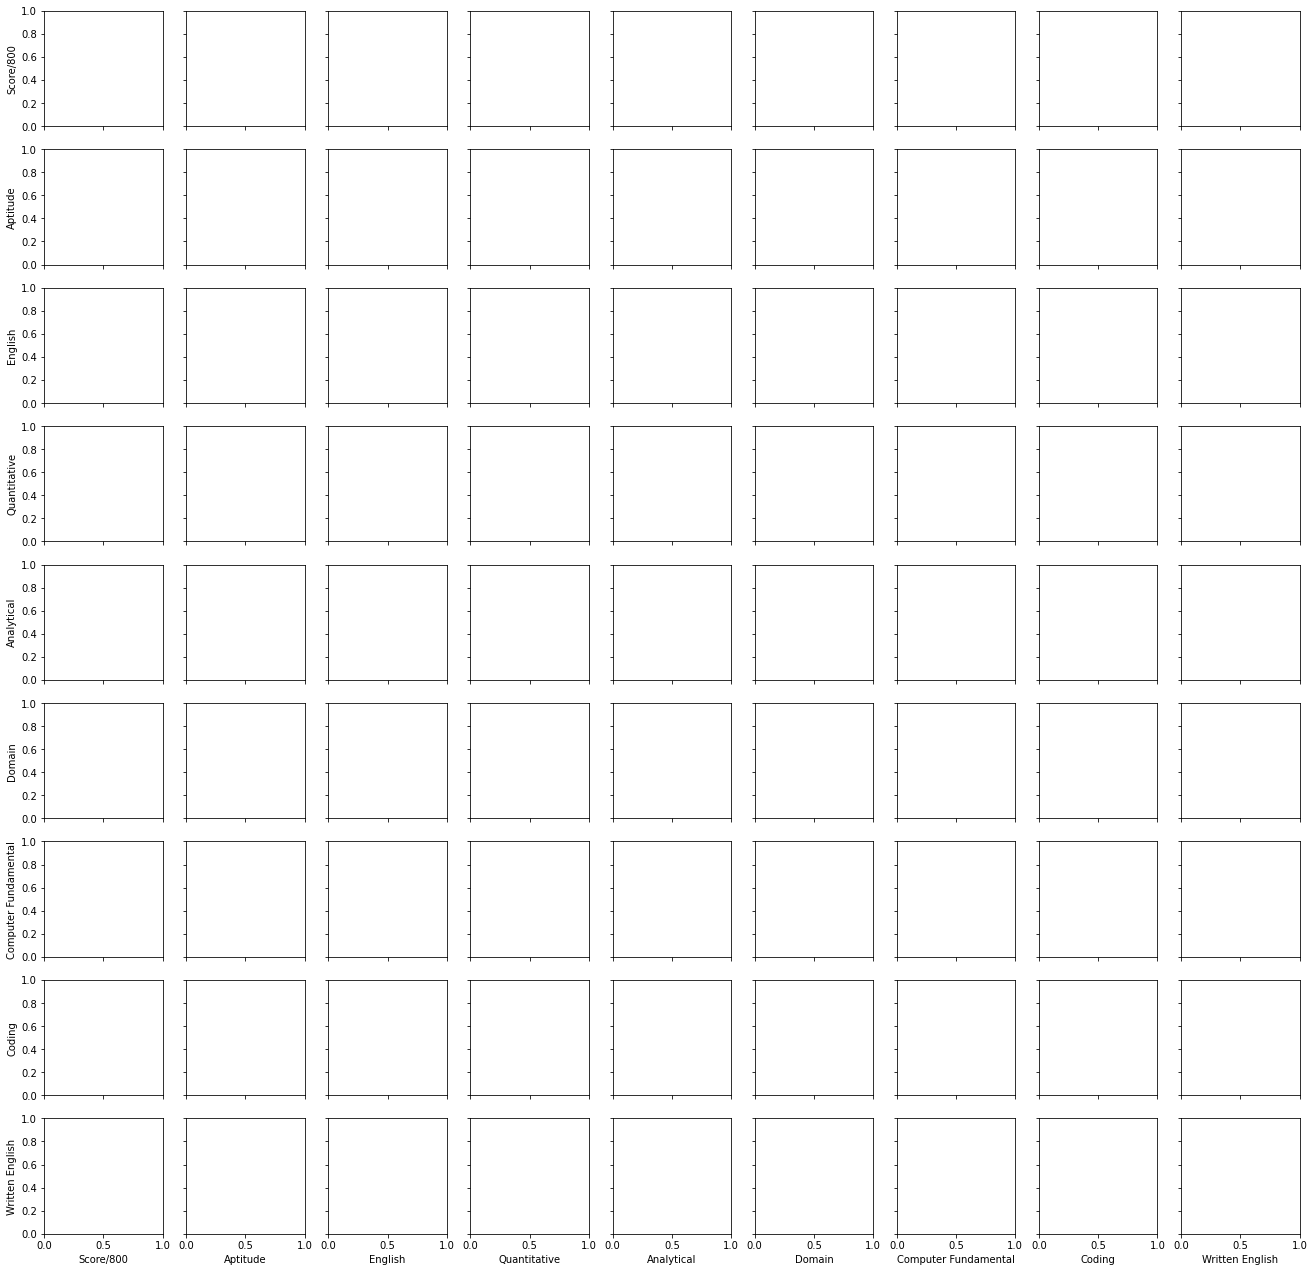

In [19]:
sns.pairplot(data=co ,hue='Placed')

In [ ]:
import pandas as pd

# Assuming the data is stored in a CSV file named 'your_file.csv'
df = pd.read_csv('data.csv', header=None)

# Concatenate all columns into a single column
stacked_data = df.stack()
stacked_data = stacked_data.str.upper()
stacked_df = stacked_data.to_frame(name='Combined')
# print(stacked_df)

# Convert all characters to uppercase


stacked_df.count().sum()
stacked_df.sample(100)

# Specify the file path including the file name and extension
excel_file_path = 'output_data.xlsx'

# Export the DataFrame to Excel
stacked_df.to_excel(excel_file_path, index=False)


PermissionError: [Errno 13] Permission denied: 'output_data.xlsx'

In [ ]:
df1 = pd.read_excel('10.xlsx',sheet_name='Sheet4')
df1.sample(10)
co =pd.read_excel('10.xlsx',sheet_name='Sheet3')
co

,Name,"Branch, Degree",Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Written English
0,Tanuja Ramesh Gadhe,"Computer Engineering, B. Tech.",666,73,73,60,87,70,67,100,77
1,Sairaj Pradip Bhakare,"Computer Engineering, B. Tech.",656,73,87,47,87,60,67,100,62
2,Vivek Vijay Kadam,"Computer Engineering, B. Tech.",656,78,80,73,80,50,67,100,67
3,Mayur Kailas Pawar,"Computer Engineering, B. Tech.",644,73,93,53,73,0,93,96,80
4,Pandhare Harshalini Balu,"Computer Engineering, B. Tech.",634,71,73,73,67,0,67,86,91
...,...,...,...,...,...,...,...,...,...,...,...
668,Wakchaure Chandrashekhar Dilip,"Civil Engineering, B. Tech.",263,29,27,27,33,25,0,0,0
669,Tejas Dattatray Ude,"Mechanical Engineering, B. Tech.",250,2,0,0,7,65,0,0,35
670,Ashok Balasaheb Jambhale,"Mechanical Engineering, B. Tech.",249,29,33,27,27,0,0,0,0
671,Shruti Devidas Navgire,"Computer Engineering, B. Tech.",248,0,0,0,0,70,53,43,43


In [ ]:
co['Name'] = co['Name'].str.upper()
df1['Name'] = df1['Name'].str.upper()

In [ ]:
co['Placed'] = co['Name'].isin(df1['Name'])

# Display the modified df_all_students
co.head(30)

,Name,"Branch, Degree",Score/800,Aptitude,English,Quantitative,Analytical,Domain,Computer Fundamental,Coding,Written English,Placed
0,TANUJA RAMESH GADHE,"Computer Engineering, B. Tech.",666,73,73,60,87,70,67,100,77,False
1,SAIRAJ PRADIP BHAKARE,"Computer Engineering, B. Tech.",656,73,87,47,87,60,67,100,62,True
2,VIVEK VIJAY KADAM,"Computer Engineering, B. Tech.",656,78,80,73,80,50,67,100,67,False
3,MAYUR KAILAS PAWAR,"Computer Engineering, B. Tech.",644,73,93,53,73,0,93,96,80,False
4,PANDHARE HARSHALINI BALU,"Computer Engineering, B. Tech.",634,71,73,73,67,0,67,86,91,True
5,UMESH KRUSHNA BOBADE,"Information Technology, B. Tech.",630,67,60,67,73,70,80,100,66,False
6,ATHARVA VINOD GHODEKAR,"Information Technology, B. Tech.",628,76,87,73,67,55,53,82,67,False
7,PRANAV PADMAKAR THORAT,"Information Technology, B. Tech.",627,69,93,40,73,50,73,100,43,False
8,VAIBHAV LOKHANDE,"Information Technology, B. Tech.",623,71,93,53,67,55,67,100,48,False
9,JOSHI PRANAV SHEKHAR,"Computer Engineering, B. Tech.",623,67,67,73,60,80,67,82,86,True


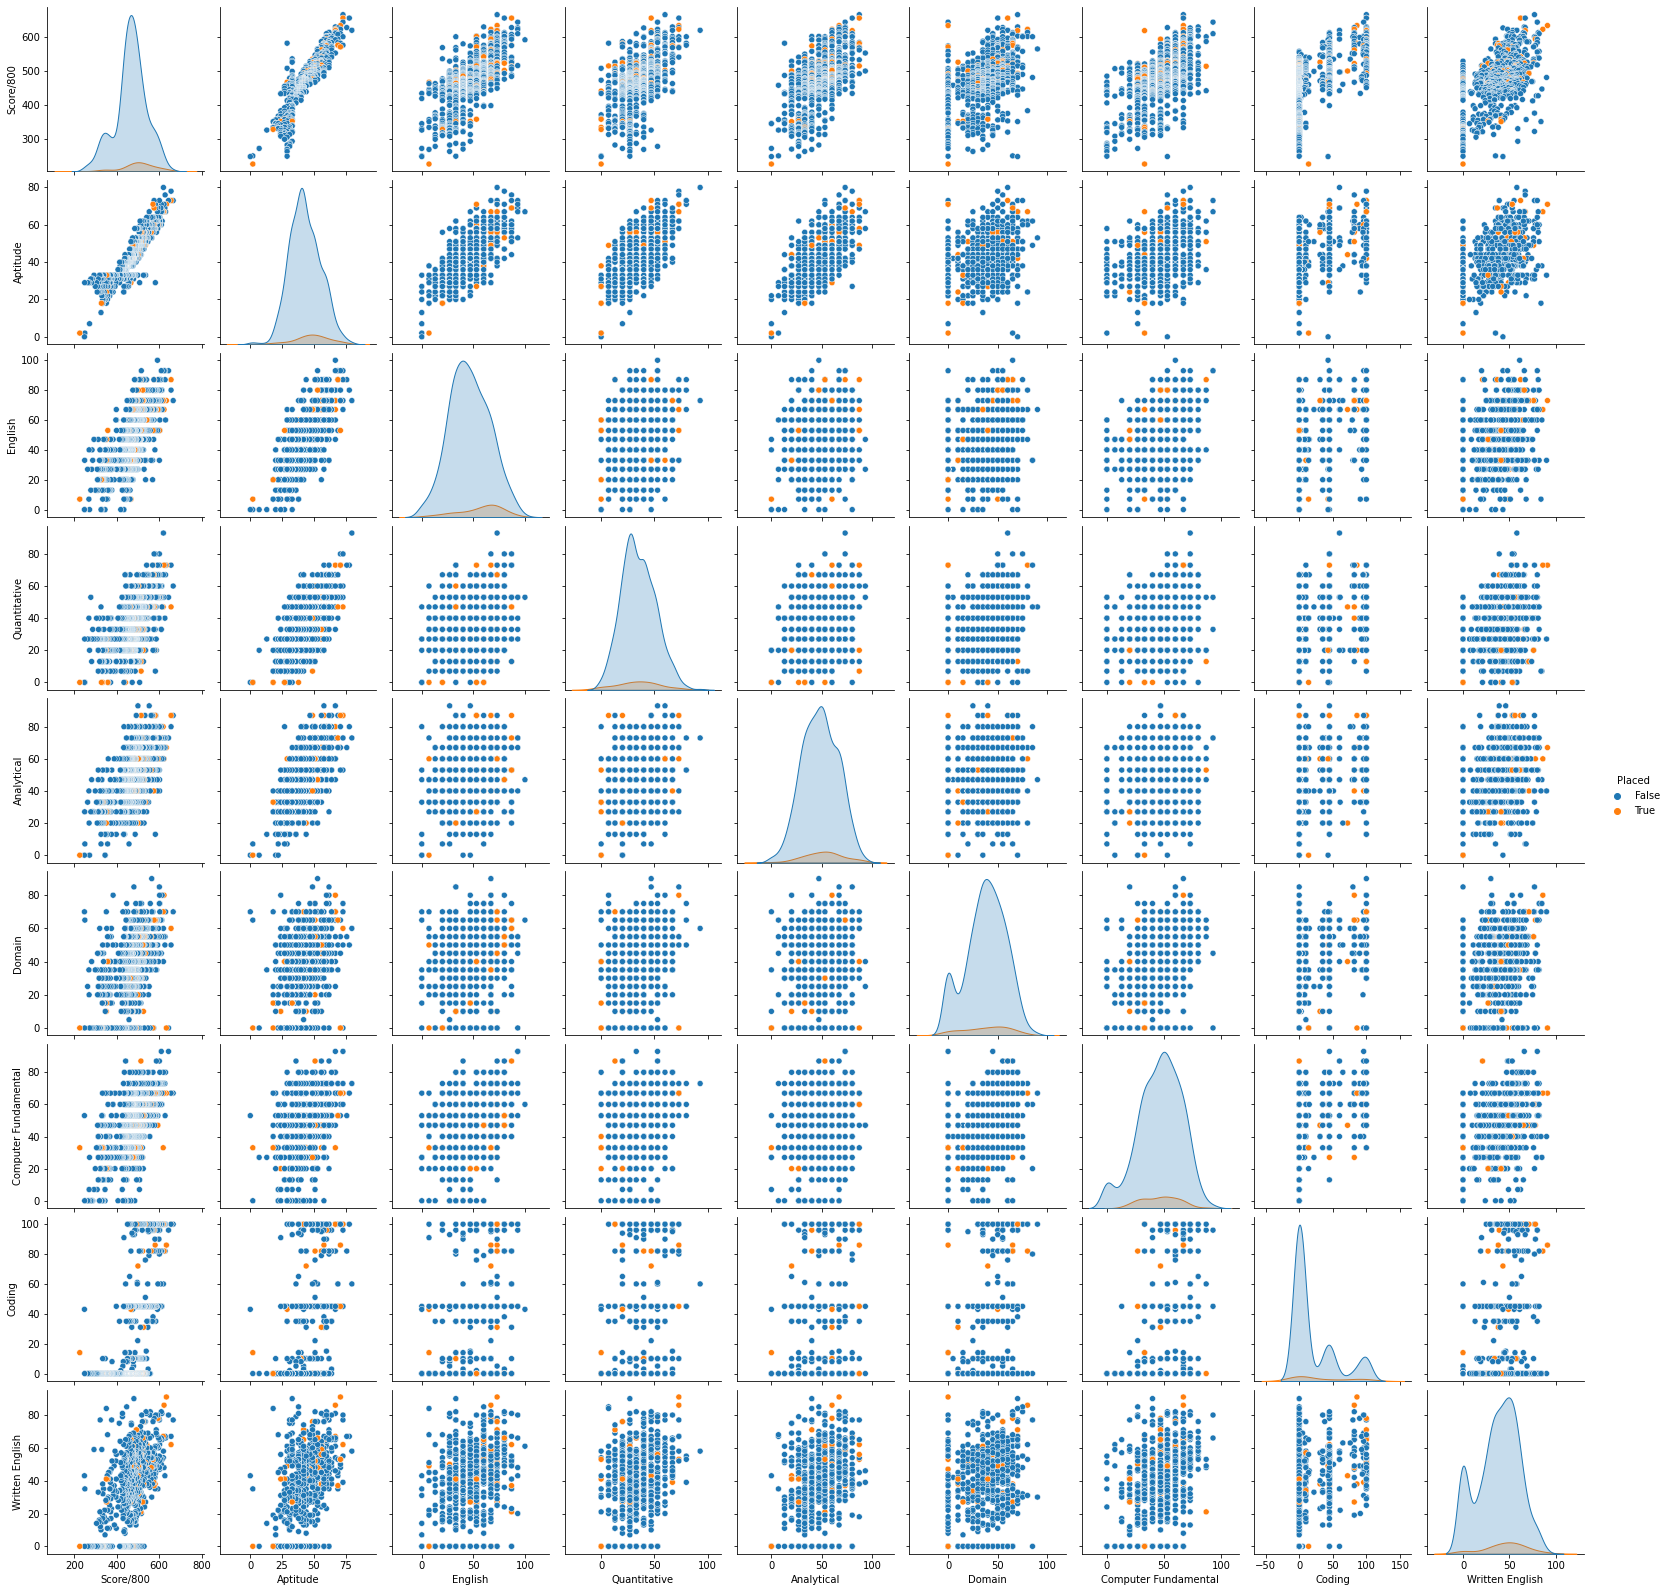

In [ ]:
sns.pairplot(co, hue='Placed')

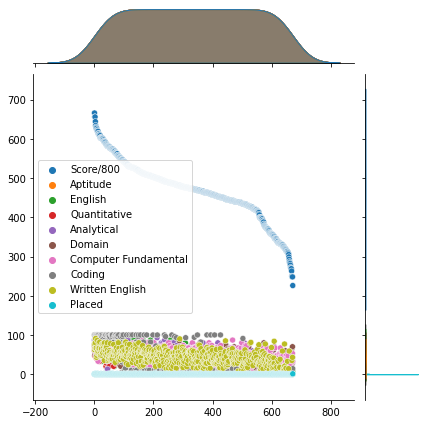

In [ ]:
sns.jointplot(co)